In [1]:
from diffusers import StableDiffusionPipeline
import torch
import os
import os.path as path

home = os.getenv('HOME')
lora = path.join(home, 'civitai', 'api', 'lora', 'happy_new_year_kanji.safetensors')

model_id = 'Linaqruf/anything-v3.0'
pipe = StableDiffusionPipeline.from_pretrained(
  model_id,
  torch_dtype=torch.float16,
  requires_safety_checker=False
)
pipe.load_lora_weights(lora)
pipe = pipe.to('cuda')
pipe.enable_xformers_memory_efficient_attention()
pipe.safety_checker = None

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (105 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['shot, light smile, closed mouth, elf, blonde hair, long hair, twintails, green eyes, hair ribbon, red ribbon,']


  0%|          | 0/66 [00:00<?, ?it/s]

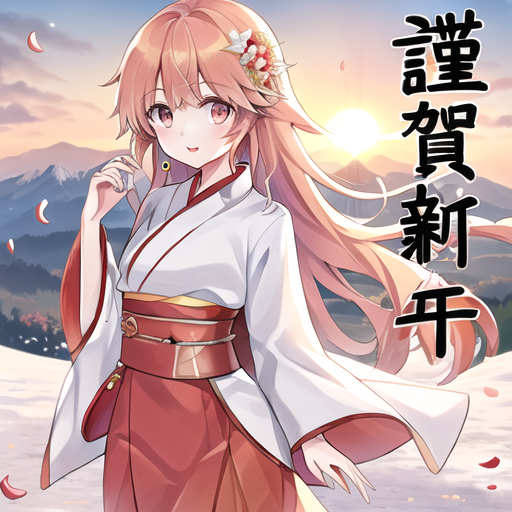

In [2]:
prompt = '<lora:happy_new_year_kanji:1> happy new year, sunrise, mountain, snow, petals, wind, <lora:mikoClothes_v20:0.3> miko clothes, long sleeves, long hakama, miko, white kimono, red hakama, 1girl, (solo:1.4), cowboy shot, light smile, closed mouth, elf, blonde hair, long hair, twintails, green eyes, hair ribbon, red ribbon,'
negative_prompt = '(nontraditional miko, detached sleeves, side breasts, ribbon trim, short hakama:1.2) EasyNegative, v sign, peace sign, (teeth, empty eyes:1.3), (hair flaps:1.3), (sad, furrowed brow, troubled eyebrows:1.3), (choker, green ribbon:1.3),'

args = dict(
  width=512,
  height=512,
  num_inference_steps=66,
)
result = pipe(prompt, negative_prompt=negative_prompt, **args)
result.images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['smile, closed mouth, twintails, green eyes, hair ribbon, red ribbon, black short hair']


  0%|          | 0/66 [00:00<?, ?it/s]

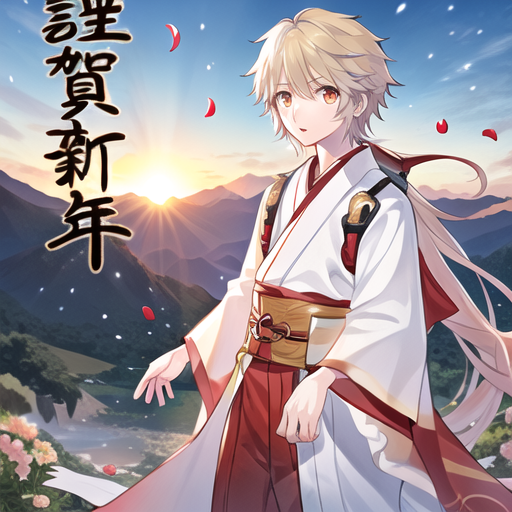

In [14]:
prompt = '<lora:happy_new_year_kanji:1> happy new year, sunrise, mountain, snow, petals, wind, <lora:mikoClothes_v20:0.3> miko clothes, long sleeves, long hakama, miko, white kimono, red hakama, 1boy, (solo:1.4), light smile, closed mouth, twintails, green eyes, hair ribbon, red ribbon, black short hair'
negative_prompt = '(nontraditional miko, detached sleeves, mutated hands, ribbon trim, short hakama:1.2) EasyNegative, v sign, peace sign, (teeth, empty eyes:1.3), (hair flaps:1.3), (sad, furrowed brow, troubled eyebrows:1.3), (choker, green ribbon:1.3),'


result = pipe(prompt, negative_prompt=negative_prompt, **args)
result.images[0]

In [11]:
result.images[0].save(path.join(home, 'Downloads', 'image.png'))